In [3]:
import torch
import torch.nn.functional as F


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def linear_beta_schedule(timesteps, start=0.0001, end=0.02):
    return torch.linspace(start, end, timesteps)




In [4]:
def get_index_from_list(vals, t, x_shape):
    """ 
    Returns a specific index t of a passed list of values vals
    while considering the batch dimension.
    """
    batch_size = t.shape[0]
    out = vals.gather(-1, t.cpu())
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)


In [5]:

# Define beta schedule
T = 300
betas = linear_beta_schedule(timesteps=T)

In [6]:
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)

In [8]:
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)

In [10]:
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)

In [9]:
alphas_cumprod_prev

tensor([1.0000, 0.9999, 0.9997, 0.9995, 0.9992, 0.9988, 0.9984, 0.9979, 0.9973,
        0.9967, 0.9960, 0.9952, 0.9944, 0.9935, 0.9926, 0.9915, 0.9905, 0.9893,
        0.9881, 0.9868, 0.9855, 0.9840, 0.9826, 0.9810, 0.9794, 0.9778, 0.9760,
        0.9743, 0.9724, 0.9705, 0.9685, 0.9665, 0.9644, 0.9623, 0.9601, 0.9578,
        0.9555, 0.9531, 0.9506, 0.9481, 0.9456, 0.9430, 0.9403, 0.9376, 0.9348,
        0.9320, 0.9291, 0.9261, 0.9232, 0.9201, 0.9170, 0.9139, 0.9107, 0.9074,
        0.9041, 0.9008, 0.8974, 0.8940, 0.8905, 0.8870, 0.8834, 0.8798, 0.8761,
        0.8724, 0.8687, 0.8649, 0.8611, 0.8572, 0.8533, 0.8493, 0.8454, 0.8413,
        0.8373, 0.8332, 0.8290, 0.8249, 0.8207, 0.8164, 0.8122, 0.8079, 0.8036,
        0.7992, 0.7948, 0.7904, 0.7859, 0.7815, 0.7770, 0.7725, 0.7679, 0.7633,
        0.7587, 0.7541, 0.7495, 0.7448, 0.7401, 0.7354, 0.7307, 0.7259, 0.7212,
        0.7164, 0.7116, 0.7068, 0.7020, 0.6972, 0.6923, 0.6874, 0.6826, 0.6777,
        0.6728, 0.6679, 0.6630, 0.6581, 

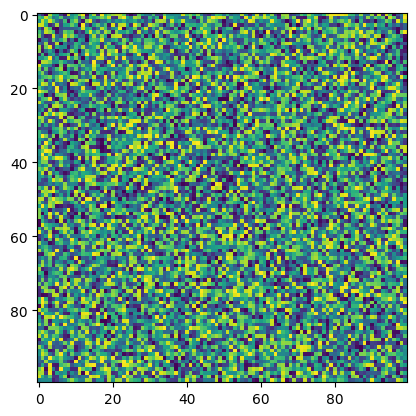

In [22]:
n = 100
input_tensor = torch.randn(n,n)

import matplotlib.pyplot as plt
from torchvision import transforms 
from PIL import Image

def show_tensor_image(tensor, title=None):
    """Show image with shape (3, H, W)"""
    # tensor = tensor.permute(1, 0)
    image = transforms.ToPILImage()(tensor)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.show()

show_tensor_image(input_tensor)